## Problem 1:

### Approximate the following function:
$\Large f ( x ) = 3x^2 + 4x - 9 $


### Steps:
1. Randomly generate the data. Generate at least 10,000 values for $x \in [-100,100]$
2. Plot the function
3. Design a feed-forward network with 2 or more hidden layers. Choose the # of hidden units in each layer (what are the size of input and output layers?)
4. Train the model (What loss function will be suitable here?)
5. Generate a test data and present the test accuracy

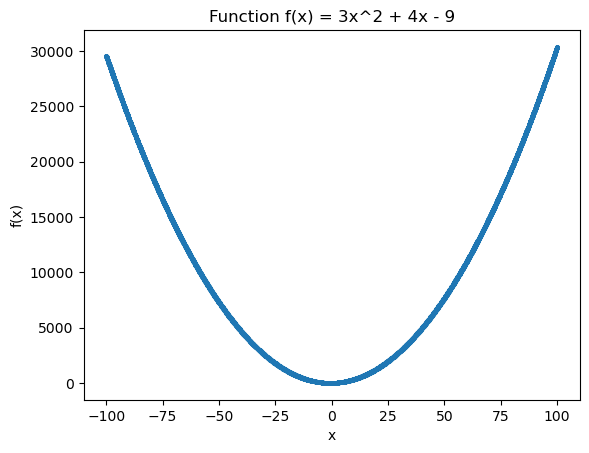

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 168232928.0000 - val_loss: 108966144.0000
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 52098288.0000 - val_loss: 26302210.0000
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 19728604.0000 - val_loss: 14027761.0000
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 11310809.0000 - val_loss: 8427770.0000
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 6498256.0000 - val_loss: 4726139.5000
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 3521412.2500 - val_loss: 2554770.7500
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 1971776.5000 - val_loss: 1517495.0000
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 1246585.0000 - val_loss: 1029328.3125
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 884181.6250 

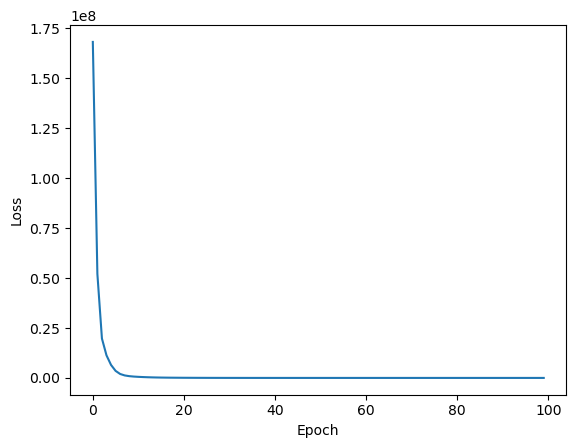

32/32 [==============================] - 0s 789us/step
Test Mean Squared Error: 66.63092063415677


In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate Data
np.random.seed(0)
x_values = np.random.uniform(-100, 100, 10000)
y_values = 3 * x_values**2 + 4 * x_values - 9

# Plot the Function
plt.scatter(x_values, y_values, s=5)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function f(x) = 3x^2 + 4x - 9')
plt.show()

# Normalize and reshape input data
x_values = x_values.reshape(-1, 1)  # Reshape to a column vector
scaler = StandardScaler()
x_values = scaler.fit_transform(x_values)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.2, random_state=42)

# Build the neural network
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=1))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))

# Plot training loss
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

# Generate test data
x_test_values = np.random.uniform(-100, 100, 1000)
y_test_values = 3 * x_test_values**2 + 4 * x_test_values - 9
x_test_values = x_test_values.reshape(-1, 1)
x_test_values = scaler.transform(x_test_values)

# Make predictions using the trained model
y_pred = model.predict(x_test_values)

# Calculate Mean Squared Error as the test accuracy
test_mse = mean_squared_error(y_test_values, y_pred)
print(f"Test Mean Squared Error: {test_mse}")


## Problem 2:

### Feedforward Network
- Hidden layer 1
- Input size 784 [28X28] image
- Hidden layer units 500
- Output size 10
- Other Hyperparameters:
 - num_epochs = 5
 - batch_size = 100
 - learning_rate = 0.001

### Try out different regularization and optimization techniques and vary the corresponding hyperparameters
- Hidden layers/units per layer
- L2 regularization
- Dropout
- RMSProp
- Adam
- Minibatches

### Tabulate your findings

In [10]:
import torch 
import torch.nn as nn
import numpy as np


import torchvision
import torchvision.transforms as transforms

In [11]:
input_size = 784
hidden_size = 500
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

### Defining the network

In [13]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        
        # Define the layers of the neural network
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        # Forward pass through the network
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)      
        return out

### Loading the datasets

<i> 
#### Note: If the following code does not work, do the following:
- open a terminal and enter
- pip install ipywidgets
- jupyter nbextension enable --py widgetsnbextension

#### If the second line shows [OK], it should work </i>

In [18]:
!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [21]:
train_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),download=True)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, shuffle=True)

In [22]:
test_dataset = torchvision.datasets.MNIST(root='data', 
                                           train=False, 
                                           transform=transforms.ToTensor(),download=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                           batch_size=batch_size, shuffle=True)

##### Display samples

1


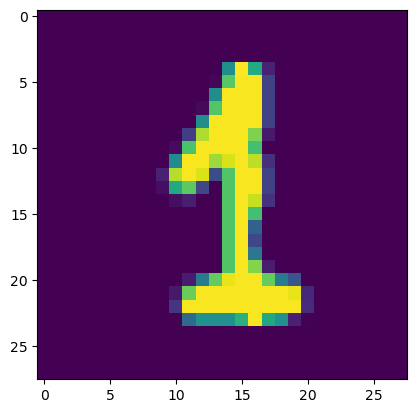

In [56]:
import matplotlib.pyplot as plt

for images, labels in train_loader:
    print(labels[0].item())
 
    plt.imshow(images[0].reshape((28,28)))
    break

In [57]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [58]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

### Train the model

In [59]:
total_step = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Reconfigure the images into a 1D vector (actually, (X,1) tensor)
        images = images.view(-1, input_size)
        
        # Forward pass
        ### Comput the output and loss
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # display the progress
        if (i+1) % 100 == 0:
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
        

Epoch [1/5], Step [100/600], Loss: 0.4391
Epoch [1/5], Step [200/600], Loss: 0.1714
Epoch [1/5], Step [300/600], Loss: 0.2227
Epoch [1/5], Step [400/600], Loss: 0.2411
Epoch [1/5], Step [500/600], Loss: 0.1702
Epoch [1/5], Step [600/600], Loss: 0.2054
Epoch [2/5], Step [100/600], Loss: 0.1590
Epoch [2/5], Step [200/600], Loss: 0.0867
Epoch [2/5], Step [300/600], Loss: 0.0762
Epoch [2/5], Step [400/600], Loss: 0.1736
Epoch [2/5], Step [500/600], Loss: 0.1576
Epoch [2/5], Step [600/600], Loss: 0.1296
Epoch [3/5], Step [100/600], Loss: 0.0394
Epoch [3/5], Step [200/600], Loss: 0.0579
Epoch [3/5], Step [300/600], Loss: 0.1724
Epoch [3/5], Step [400/600], Loss: 0.0917
Epoch [3/5], Step [500/600], Loss: 0.1435
Epoch [3/5], Step [600/600], Loss: 0.0357
Epoch [4/5], Step [100/600], Loss: 0.0387
Epoch [4/5], Step [200/600], Loss: 0.0328
Epoch [4/5], Step [300/600], Loss: 0.0948
Epoch [4/5], Step [400/600], Loss: 0.0437
Epoch [4/5], Step [500/600], Loss: 0.0563
Epoch [4/5], Step [600/600], Loss:

#### Taking 4 samples from the test set 
- display the image
- print the true label
- print the output probability distribution
- print the predicted class

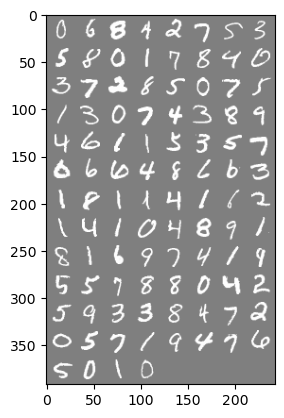

True Label: 0
Predicted Class: 0
Probability Distribution: [0.9907087087631226, 1.700851680652704e-05, 0.0007598159718327224, 7.293777889572084e-05, 3.762588676181622e-06, 0.00040317056118510664, 0.0002071602939395234, 0.0004128578584641218, 0.0004489244020078331, 0.006965565029531717]


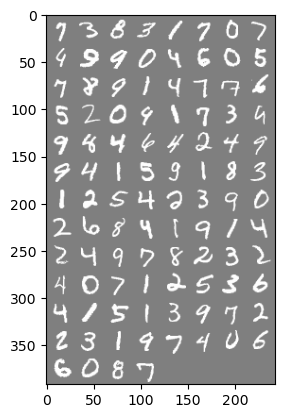

True Label: 7
Predicted Class: 7
Probability Distribution: [3.834492279253254e-09, 4.7626258492527995e-06, 2.1866644317469763e-07, 8.37331754155457e-06, 6.274333941291843e-08, 2.116251209827169e-07, 2.795492515857839e-13, 0.9997709393501282, 2.6773437866722816e-07, 0.00021515946718864143]


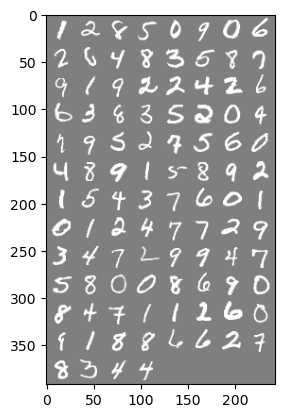

True Label: 1
Predicted Class: 1
Probability Distribution: [2.484504193489556e-07, 0.999881386756897, 4.422074198373593e-06, 2.616792187382089e-07, 1.6582051785007934e-06, 2.6093919913705577e-08, 3.50100890500471e-08, 9.418534318683669e-05, 1.758470716595184e-05, 2.043395426198913e-07]


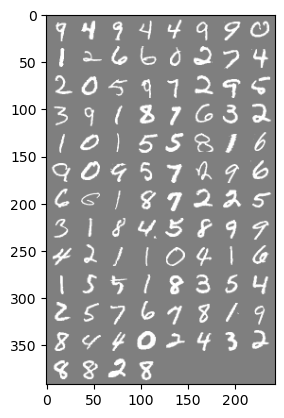

True Label: 9
Predicted Class: 9
Probability Distribution: [2.919960051528392e-09, 2.227789445896633e-05, 1.9513538518367568e-07, 0.0006033836398273706, 0.004205387085676193, 3.7430405086524843e-07, 7.947340702196826e-11, 0.023955000564455986, 4.501739385887049e-05, 0.9711682796478271]


In [62]:
# Define a function to display an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize the image
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Switch model to evaluation mode as important for inference
model.eval()

sample_count = 0

# Iterate through the test set
for images, labels in test_loader:
    # Perform inference
    with torch.no_grad():
        images_flattened = images.view(-1, input_size)
        outputs = model(images_flattened)
    
    # Get predicted class and probability distribution
    _, predicted = torch.max(outputs, 1)
    probs = torch.softmax(outputs, dim=1)
    
    # Display the image
    imshow(torchvision.utils.make_grid(images))
    
    print(f'True Label: {labels[0].item()}')
    print(f'Predicted Class: {predicted[0].item()}')
    print(f'Probability Distribution: {probs[0].tolist()}')
    
    sample_count += 1
    
    # Break the loop after processing 4 samples
    if sample_count == 4:
        break
